Implement Autoencoders in TensorFlow

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("TensorFlow version:", tf.__version__)

# Load and preprocess MNIST dataset
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images for basic autoencoder
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

print(f"Flattened training data shape: {x_train_flat.shape}")



TensorFlow version: 2.18.0
Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Flattened training data shape: (60000, 784)


In [2]:
# =============================================================================
# 1. BASIC DENSE AUTOENCODER
# =============================================================================

print("\n" + "="*60)
print("BUILDING BASIC DENSE AUTOENCODER")
print("="*60)

# Hyperparameters
input_dim = 784  # 28x28
encoding_dim = 64  # Compressed representation size
epochs = 50
batch_size = 256

# Build encoder
encoder_input = layers.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(encoder_input)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

# Build decoder
decoded = layers.Dense(128, activation='relu')(encoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Create autoencoder model
basic_autoencoder = keras.Model(encoder_input, decoded)

# Compile model
basic_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

print("Basic Autoencoder Architecture:")
basic_autoencoder.summary()

# Train basic autoencoder
print("Training Basic Autoencoder...")
basic_history = basic_autoencoder.fit(
    x_train_flat, x_train_flat,  # Input and target are the same
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(x_test_flat, x_test_flat),
    verbose=1
)

# Create separate encoder model for visualization
encoder_model = keras.Model(encoder_input, encoded)




BUILDING BASIC DENSE AUTOENCODER
Basic Autoencoder Architecture:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

Training Basic Autoencoder...
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.3266 - mse: 0.0884 - val_loss: 0.1443 - val_mse: 0.0268
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1354 - mse: 0.0238 - val_loss: 0.1133 - val_mse: 0.0166
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1119 - mse: 0.0161 - val_loss: 0.1026 - val_mse: 0.0132
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1025 - mse: 0.0131 - val_loss: 0.0965 - val_mse: 0.0113
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0969 - mse: 0.0113 - val_loss: 0.0927 - val_mse: 0.0101
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0933 - mse: 0.0102 - val_loss: 0.0901 - val_mse: 0.0092
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0908 - mse: 0.0094 - val_loss: 0.0880 - val_mse: 0.0086
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0888 - mse: 0.0087 - val_loss: 0.0863 - val_mse: 0.0080
Epoch 9/50
235/235 ━━━━━━

In [3]:
# =============================================================================
# 2. CONVOLUTIONAL AUTOENCODER
# =============================================================================

print("\n" + "="*60)
print("BUILDING CONVOLUTIONAL AUTOENCODER")
print("="*60)

# Reshape data for CNN (add channel dimension)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Build convolutional encoder
conv_input = layers.Input(shape=(28, 28, 1))

# Encoder
conv_encoded = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv_input)
conv_encoded = layers.MaxPooling2D((2, 2), padding='same')(conv_encoded)
conv_encoded = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(conv_encoded)
conv_encoded = layers.MaxPooling2D((2, 2), padding='same')(conv_encoded)
conv_encoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(conv_encoded)
conv_encoded = layers.MaxPooling2D((2, 2), padding='same')(conv_encoded)

# Decoder
conv_decoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(conv_encoded)
conv_decoded = layers.UpSampling2D((2, 2))(conv_decoded)
conv_decoded = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(conv_decoded)
conv_decoded = layers.UpSampling2D((2, 2))(conv_decoded)
conv_decoded = layers.Conv2D(32, (3, 3), activation='relu')(conv_decoded)
conv_decoded = layers.UpSampling2D((2, 2))(conv_decoded)
conv_decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv_decoded)

# Create convolutional autoencoder
conv_autoencoder = keras.Model(conv_input, conv_decoded)

# Compile model
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

print("Convolutional Autoencoder Architecture:")
conv_autoencoder.summary()

# Train convolutional autoencoder
print("Training Convolutional Autoencoder...")
conv_history = conv_autoencoder.fit(
    x_train_cnn, x_train_cnn,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(x_test_cnn, x_test_cnn),
    verbose=1
)




BUILDING CONVOLUTIONAL AUTOENCODER
Convolutional Autoencoder Architecture:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 8)        │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,785 (49.94 KB)

 Trainable params: 12,785 (49.94 KB)

 Non-trainable params: 0 (0.00 B)

Training Convolutional Autoencoder...
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - loss: 0.3398 - mse: 0.0921 - val_loss: 0.1560 - val_mse: 0.0323
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1476 - mse: 0.0291 - val_loss: 0.1284 - val_mse: 0.0224
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1269 - mse: 0.0218 - val_loss: 0.1188 - val_mse: 0.0191
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1189 - mse: 0.0190 - val_loss: 0.1137 - val_mse: 0.0174
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1143 - mse: 0.0175 - val_loss: 0.1104 - val_mse: 0.0163
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1108 - mse: 0.0163 - val_loss: 0.1080 - val_mse: 0.0155
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1083 - mse: 0.0155 - val_loss: 0.1054 - val_mse: 0.0146
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1062 - mse: 0.0148 - val_loss: 0.1036 - val_mse: 0.0140
Epoch 9/50
235/

In [4]:
# =============================================================================
# 3. DENOISING AUTOENCODER
# =============================================================================

print("\n" + "="*60)
print("BUILDING DENOISING AUTOENCODER")
print("="*60)

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train_flat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_flat.shape)
x_test_noisy = x_test_flat + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_flat.shape)

# Clip values to [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Build denoising autoencoder (same architecture as basic)
denoise_input = layers.Input(shape=(input_dim,))
denoise_encoded = layers.Dense(128, activation='relu')(denoise_input)
denoise_encoded = layers.Dense(encoding_dim, activation='relu')(denoise_encoded)
denoise_decoded = layers.Dense(128, activation='relu')(denoise_encoded)
denoise_decoded = layers.Dense(input_dim, activation='sigmoid')(denoise_decoded)

denoising_autoencoder = keras.Model(denoise_input, denoise_decoded)

# Compile model
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

print("Denoising Autoencoder Architecture:")
denoising_autoencoder.summary()

# Train denoising autoencoder (input: noisy, target: clean)
print("Training Denoising Autoencoder...")
denoise_history = denoising_autoencoder.fit(
    x_train_noisy, x_train_flat,  # Input: noisy, Target: clean
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(x_test_noisy, x_test_flat),
    verbose=1
)




BUILDING DENOISING AUTOENCODER
Denoising Autoencoder Architecture:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,192 (852.31 KB)

 Trainable params: 218,192 (852.31 KB)

 Non-trainable params: 0 (0.00 B)

Training Denoising Autoencoder...
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.3285 - mse: 0.0895 - val_loss: 0.1784 - val_mse: 0.0384
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1709 - mse: 0.0357 - val_loss: 0.1521 - val_mse: 0.0294
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1499 - mse: 0.0286 - val_loss: 0.1410 - val_mse: 0.0258
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1406 - mse: 0.0255 - val_loss: 0.1351 - val_mse: 0.0238
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1350 - mse: 0.0236 - val_loss: 0.1312 - val_mse: 0.0225
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1312 - mse: 0.0224 - val_loss: 0.1282 - val_mse: 0.0215
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1282 - mse: 0.0214 - val_loss: 0.1254 - val_mse: 0.0206
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1255 - mse: 0.0205 - val_loss: 0.1233 - val_mse: 0.0199
Epoch 9/50
235/235 ━━


EVALUATING MODELS
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Basic Autoencoder MSE: 0.003983
Convolutional Autoencoder MSE: 0.008255
Denoising Autoencoder MSE: 0.016138


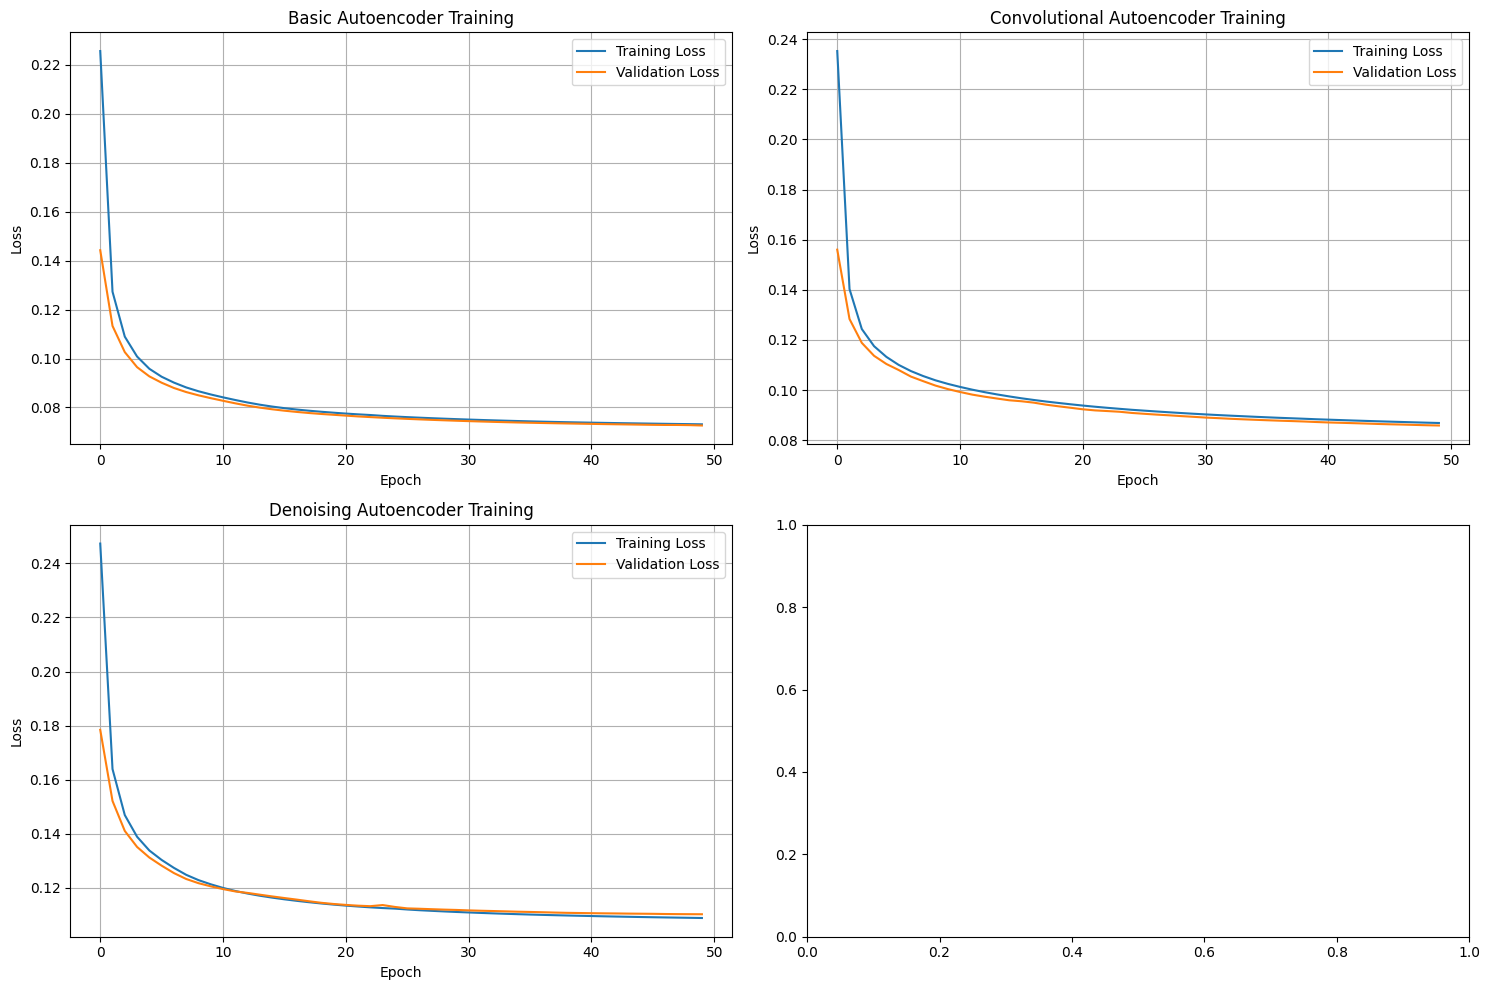

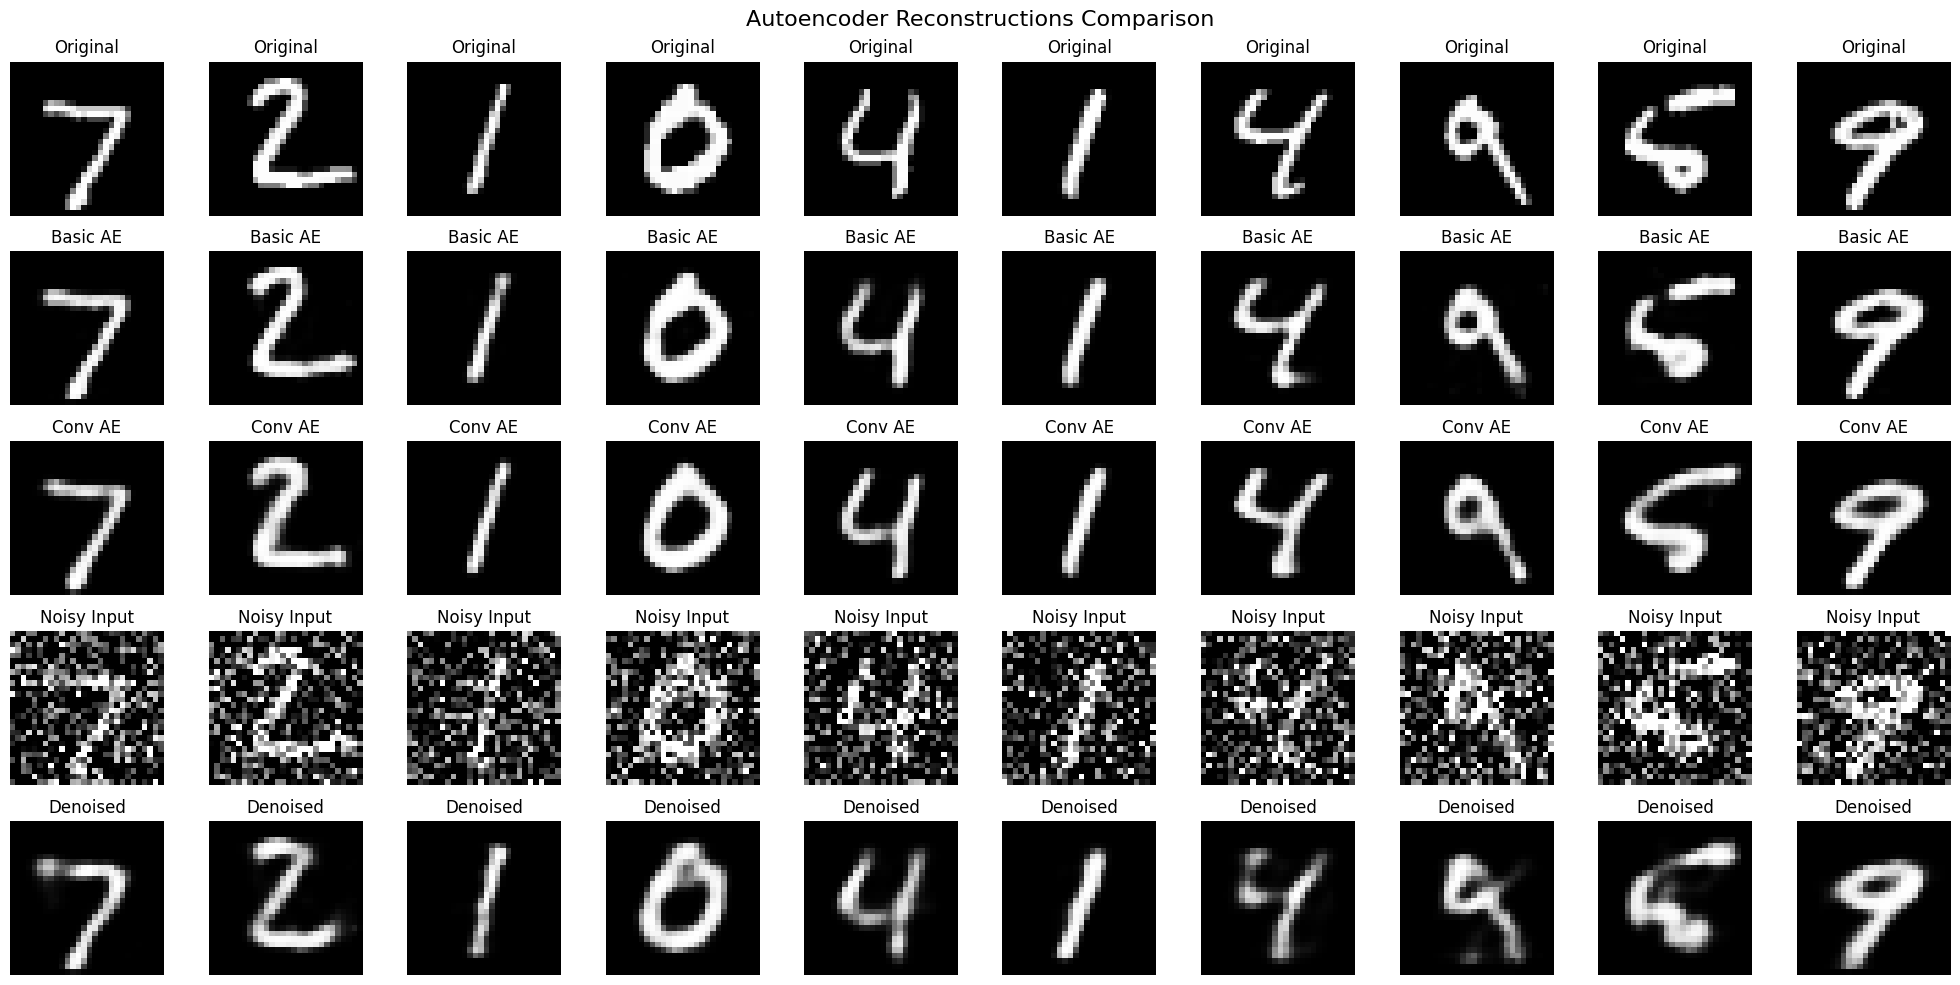

Visualizing latent space representations...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


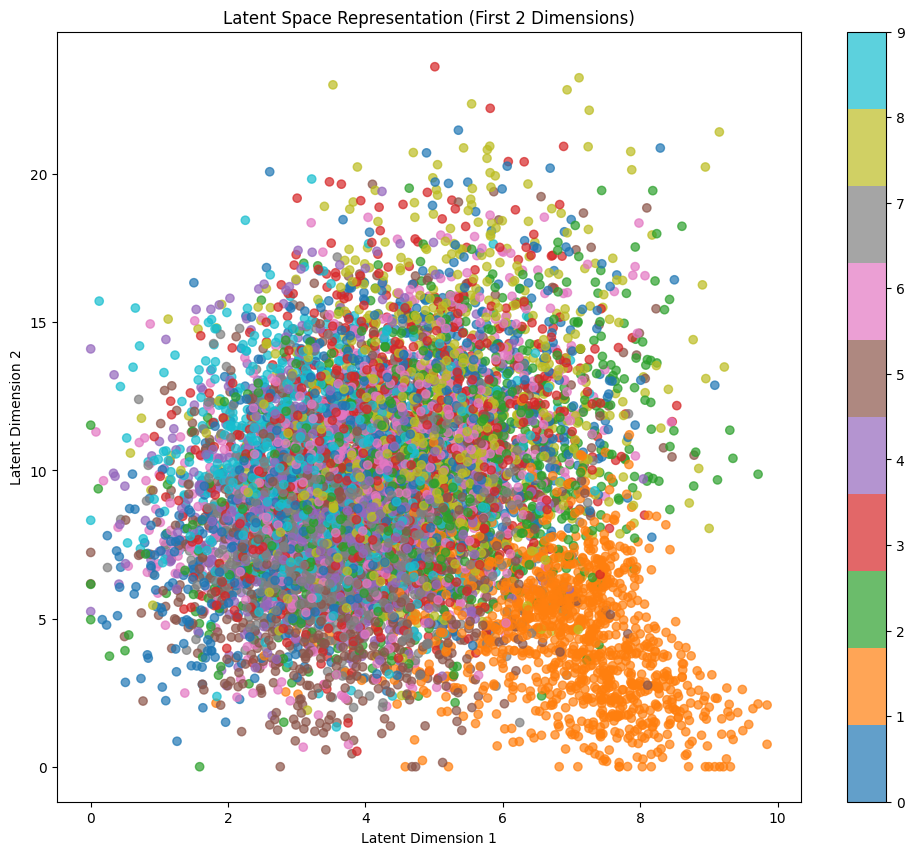

In [7]:
# =============================================================================
# EVALUATION AND VISUALIZATION
# =============================================================================

print("\n" + "="*60)
print("EVALUATING MODELS")
print("="*60)

# Make predictions
basic_predictions = basic_autoencoder.predict(x_test_flat[:10])
conv_predictions = conv_autoencoder.predict(x_test_cnn[:10])
denoise_predictions = denoising_autoencoder.predict(x_test_noisy[:10])


# Calculate reconstruction errors
basic_mse = mean_squared_error(x_test_flat[:1000].flatten(),
                              basic_autoencoder.predict(x_test_flat[:1000]).flatten())
conv_mse = mean_squared_error(x_test_cnn[:1000].flatten(),
                             conv_autoencoder.predict(x_test_cnn[:1000]).flatten())
denoise_mse = mean_squared_error(x_test_flat[:1000].flatten(),
                                denoising_autoencoder.predict(x_test_noisy[:1000]).flatten())


print(f"Basic Autoencoder MSE: {basic_mse:.6f}")
print(f"Convolutional Autoencoder MSE: {conv_mse:.6f}")
print(f"Denoising Autoencoder MSE: {denoise_mse:.6f}")

# Plot training histories
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Basic Autoencoder
axes[0,0].plot(basic_history.history['loss'], label='Training Loss')
axes[0,0].plot(basic_history.history['val_loss'], label='Validation Loss')
axes[0,0].set_title('Basic Autoencoder Training')
axes[0,0].set_xlabel('Epoch')
axes[0,0].set_ylabel('Loss')
axes[0,0].legend()
axes[0,0].grid(True)

# Convolutional Autoencoder
axes[0,1].plot(conv_history.history['loss'], label='Training Loss')
axes[0,1].plot(conv_history.history['val_loss'], label='Validation Loss')
axes[0,1].set_title('Convolutional Autoencoder Training')
axes[0,1].set_xlabel('Epoch')
axes[0,1].set_ylabel('Loss')
axes[0,1].legend()
axes[0,1].grid(True)

# Denoising Autoencoder
axes[1,0].plot(denoise_history.history['loss'], label='Training Loss')
axes[1,0].plot(denoise_history.history['val_loss'], label='Validation Loss')
axes[1,0].set_title('Denoising Autoencoder Training')
axes[1,0].set_xlabel('Epoch')
axes[1,0].set_ylabel('Loss')
axes[1,0].legend()
axes[1,0].grid(True)



plt.tight_layout()
plt.show()

# Visualize reconstructions
fig, axes = plt.subplots(5, 10, figsize=(20, 10))

for i in range(10):
    # Original images
    axes[0, i].imshow(x_test[i], cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')

    # Basic autoencoder
    axes[1, i].imshow(basic_predictions[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title('Basic AE')
    axes[1, i].axis('off')

    # Convolutional autoencoder
    axes[2, i].imshow(conv_predictions[i].reshape(28, 28), cmap='gray')
    axes[2, i].set_title('Conv AE')
    axes[2, i].axis('off')

    # Denoising autoencoder (show noisy input and denoised output)
    axes[3, i].imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    axes[3, i].set_title('Noisy Input')
    axes[3, i].axis('off')

    # Denoising output
    axes[4, i].imshow(denoise_predictions[i].reshape(28, 28), cmap='gray')
    axes[4, i].set_title('Denoised')
    axes[4, i].axis('off')

plt.suptitle('Autoencoder Reconstructions Comparison', fontsize=16)
plt.tight_layout()
plt.show()

# Visualize latent space representations (for basic autoencoder)
print("Visualizing latent space representations...")

# Encode test data
encoded_imgs = encoder_model.predict(x_test_flat)

# Plot latent space (first 2 dimensions)
plt.figure(figsize=(12, 10))
scatter = plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('Latent Space Representation (First 2 Dimensions)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()

